In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)

df = pd.read_csv("cbb.csv")
df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,30.0,32.3,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,15.8,32.1,23.7,36.2,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,19.5,25.5,24.9,30.7,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,22.8,27.4,28.7,32.9,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,17.1,30.0,26.2,39.0,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017


## Data Cleaning

In [2]:

#New column if made postseason

postseason_rank = ["R64", "R32", "S16", "R68", "E8", "F4", "2ND", "CHAMPIONS"]

def ps(row):
    if row['POSTSEASON'] not in postseason_rank:
        return 0
    else:
        return 1
    
df['PLAYOFF'] = df.apply(lambda row: ps(row), axis=1)

#df.head() reveals not all games played equal
#win ratio would make sense as opposed to total wins

df['W_ratio'] = df['W'] / df['G']
df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,PLAYOFF,W_ratio
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,30.0,32.3,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016,1,0.825000
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,15.8,32.1,23.7,36.2,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015,1,0.900000
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,19.5,25.5,24.9,30.7,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018,1,0.825000
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,22.8,27.4,28.7,32.9,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019,1,0.815789
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,17.1,30.0,26.2,39.0,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017,1,0.948718


## EDA

In [3]:
#Teams that make/do not make playoffs
df.PLAYOFF.value_counts()

0    1986
1     469
Name: PLAYOFF, dtype: int64

In [4]:
df.describe()

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,YEAR,PLAYOFF,W_ratio
count,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.00000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,476.000000,2455.000000,2455.000000,2455.000000
mean,31.492464,16.284318,103.304481,103.304603,0.493957,49.805132,50.001385,18.763055,18.689572,29.875642,30.075479,35.989776,36.26998,48.802281,48.976660,34.406395,34.598737,67.812301,-7.802485,8.802521,2016.007332,0.191039,0.508203
std,2.657401,6.610960,7.376981,6.605318,0.256244,3.143061,2.939602,2.090595,2.201749,4.134332,3.151454,5.247820,6.24590,3.384468,3.340546,2.789434,2.415766,3.277622,6.965736,4.676354,1.999375,0.393200,0.179726
min,15.000000,0.000000,76.600000,84.000000,0.005000,39.200000,39.600000,11.900000,10.200000,15.000000,18.400000,21.600000,21.80000,37.700000,37.700000,24.900000,27.100000,57.200000,-25.200000,1.000000,2013.000000,0.000000,0.000000
25%,30.000000,11.000000,98.300000,98.500000,0.282200,47.750000,48.000000,17.300000,17.200000,27.100000,27.900000,32.400000,31.90000,46.500000,46.700000,32.500000,33.000000,65.700000,-13.000000,5.000000,2014.000000,0.000000,0.379310
50%,31.000000,16.000000,103.000000,103.500000,0.475000,49.700000,50.000000,18.700000,18.600000,29.900000,30.000000,35.800000,35.80000,48.700000,49.000000,34.400000,34.600000,67.800000,-8.300000,9.000000,2016.000000,0.000000,0.516129
75%,33.000000,21.000000,108.000000,107.900000,0.712200,51.900000,52.000000,20.100000,20.100000,32.600000,32.200000,39.500000,40.20000,51.000000,51.300000,36.300000,36.200000,70.000000,-3.150000,13.000000,2018.000000,0.000000,0.636364
max,40.000000,38.000000,129.100000,124.000000,0.984200,59.800000,59.500000,27.100000,28.500000,43.600000,40.400000,58.600000,60.70000,62.600000,61.200000,44.100000,43.100000,83.400000,13.100000,16.000000,2019.000000,1.000000,0.974359


In [5]:
df.columns

Index(['TEAM', 'CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'POSTSEASON', 'SEED', 'YEAR', 'PLAYOFF',
       'W_ratio'],
      dtype='object')

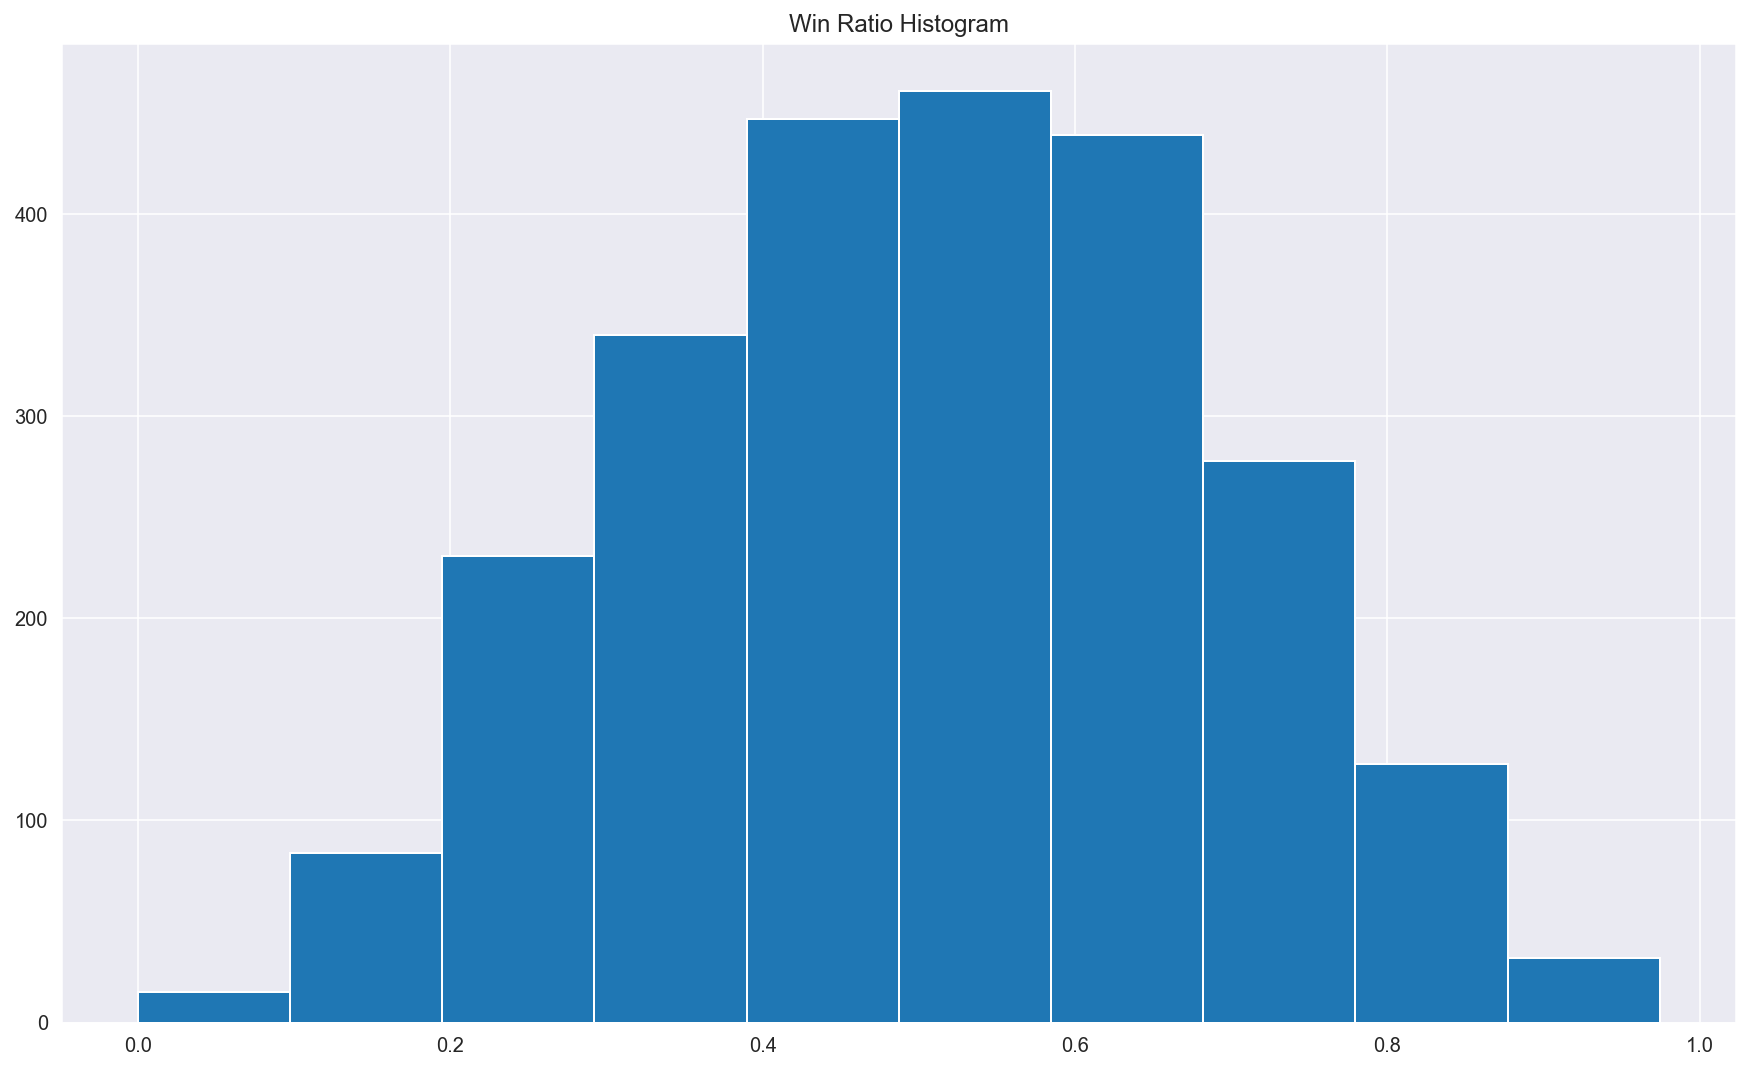

In [54]:
#observing distributions of some numeric variables
title = "Win Ratio Histogram"
ax1 = df.W_ratio.hist()
ax1.set_title(title)
ax1

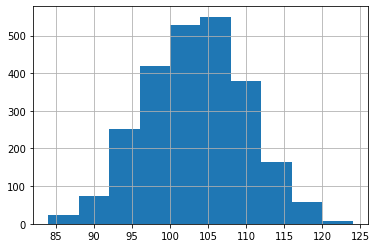

In [7]:
df.ADJDE.hist()

In [8]:
corr = df[['W', 'W_ratio','ADJOE','ADJDE','EFG_O','EFG_D','TOR','TORD','ORB','DRB','FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T']].corr()

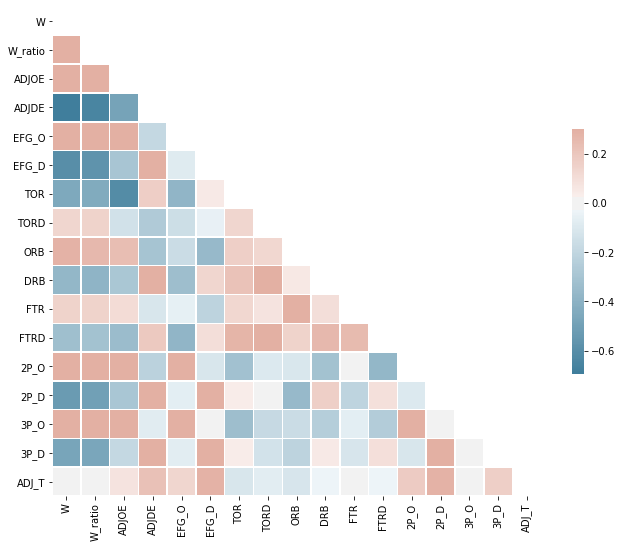

In [9]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [10]:
df.columns

Index(['TEAM', 'CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'POSTSEASON', 'SEED', 'YEAR', 'PLAYOFF',
       'W_ratio'],
      dtype='object')

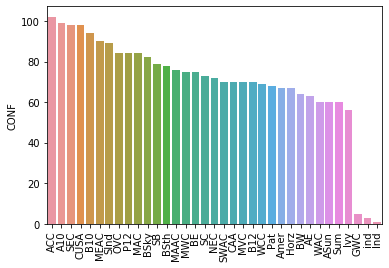

In [11]:
cat_num = df["CONF"].value_counts()
chart = sns.barplot(x=cat_num.index, y=cat_num)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

In [12]:
pd.pivot_table(df, index = 'TEAM',values = 'W_ratio').sort_values('W_ratio', ascending=False)

,W_ratio
TEAM,
Gonzaga,0.872512
Villanova,0.818782
Virginia,0.806197
Wichita St.,0.795254
Duke,0.792960
...,...
Alabama A&M,0.243395
Maine,0.211023
San Jose St.,0.206240


In [13]:
pd.pivot_table(df, index = 'TEAM', values = 'PLAYOFF').sort_values('PLAYOFF', ascending=False)

,PLAYOFF
TEAM,
Kansas,1.000000
Michigan St.,1.000000
Cincinnati,1.000000
Gonzaga,1.000000
Michigan,0.857143
...,...
Loyola MD,0.000000
Loyola Marymount,0.000000
Maine,0.000000


## Model Building

In [14]:
#relevant columns
df.columns

Index(['TEAM', 'CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'POSTSEASON', 'SEED', 'YEAR', 'PLAYOFF',
       'W_ratio'],
      dtype='object')

In [15]:
df_model = df[["W_ratio",'ADJOE', 'ADJDE', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D']]

In [52]:


X = df_model.drop('W_ratio',axis=1)
y=df_model.W_ratio.values


In [17]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     1062.
Date:                Tue, 03 Aug 2021   Prob (F-statistic):               0.00
Time:                        16:48:59   Log-Likelihood:                 3135.1
No. Observations:                2455   AIC:                            -6240.
Df Residuals:                    2440   BIC:                            -6153.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2818      0.067      4.225      0.000       0.151       0.413
ADJOE          0.0004      0.001      0.652      0.514      -0.001       0.002
ADJDE          0.0031      0.001      4.627      0.000       0.002       0.004
EFG_O          0.0316      0.005      5.988      0.000       0.021       0.042
EFG_D         -0.0327      0.007     -4.639      0.000      -0.047      -0.019
TOR           -0.0223      0.001    -19.093      0.000      -0.025      -0.020
TORD           0.0287      0.001     26.736      0.000       0.027       0.031
ORB            0.0094      0.001     16.600      0.000       0.008       0.011
DRB           -0.0140      0.001    -21.634      0.000      -0.015      -0.013
FTR            0.0033      0.000     10.863      0.000       0.003       0.004
FTRD          -0.0043      0.000    -15.415      0.000      -0.005      -0.004
2P_O          -0.0038      0.003     -1.142      0.253      -0.010       0.003
2P_D           0.0055      0.005      1.203      0.229      -0.003       0.014
3P_O          -0.0026      0.003     -0.938      0.348      -0.008       0.003
3P_D          -0.0004      0.004     -0.100      0.921      -0.008       0.007
==============================================================================
Omnibus:                        3.090   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.213   Jarque-Bera (JB):                3.086
Skew:                           0.057   Prob(JB):                        0.214
Kurtosis:                       3.131   Cond. No.                     9.60e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
#suspect high multicollinearity of variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
pd.DataFrame({'vif': vif[1]}, index=X.columns).T

,const,ADJOE,ADJDE,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D
vif,13.491962,13.491962,13.491962,13.491962,13.491962,13.491962,13.491962,13.491962,13.491962,13.491962,13.491962,13.491962,13.491962,13.491962,13.491962


In [23]:
#reduce variables 
df_model_reduced = df[["W_ratio",'TOR', 'TORD', 'ORB', 'DRB', '2P_O', '2P_D', '3P_O',
       '3P_D']]

In [39]:
#refit OLS model
X = df_model_reduced.drop('W_ratio',axis=1)
y=df_model_reduced.W_ratio.values
X = sm.add_constant(X)
est2 = sm.OLS(y, X).fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     1586.
Date:                Tue, 03 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:05:59   Log-Likelihood:                 2967.5
No. Observations:                2455   AIC:                            -5917.
Df Residuals:                    2446   BIC:                            -5865.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3976      0.053      7.503      0.000       0.294       0.502
TOR           -0.0229      0.001    -29.796      0.000      -0.024      -0.021
TORD           0.0217      0.001     30.402      0.000       0.020       0.023
ORB            0.0096      0.000     24.472      0.000       0.009       0.010
DRB           -0.0117      0.001    -22.546      0.000      -0.013      -0.011
2P_O           0.0190      0.001     37.827      0.000       0.018       0.020
2P_D          -0.0135      0.001    -26.449      0.000      -0.015      -0.013
3P_O           0.0147      0.001     24.352      0.000       0.014       0.016
3P_D          -0.0165      0.001    -24.528      0.000      -0.018      -0.015
==============================================================================
Omnibus:                        0.544   Durbin-Watson:                   1.702
Prob(Omnibus):                  0.762   Jarque-Bera (JB):                0.499
Skew:                           0.032   Prob(JB):                        0.779
Kurtosis:                       3.026   Cond. No.                     3.57e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

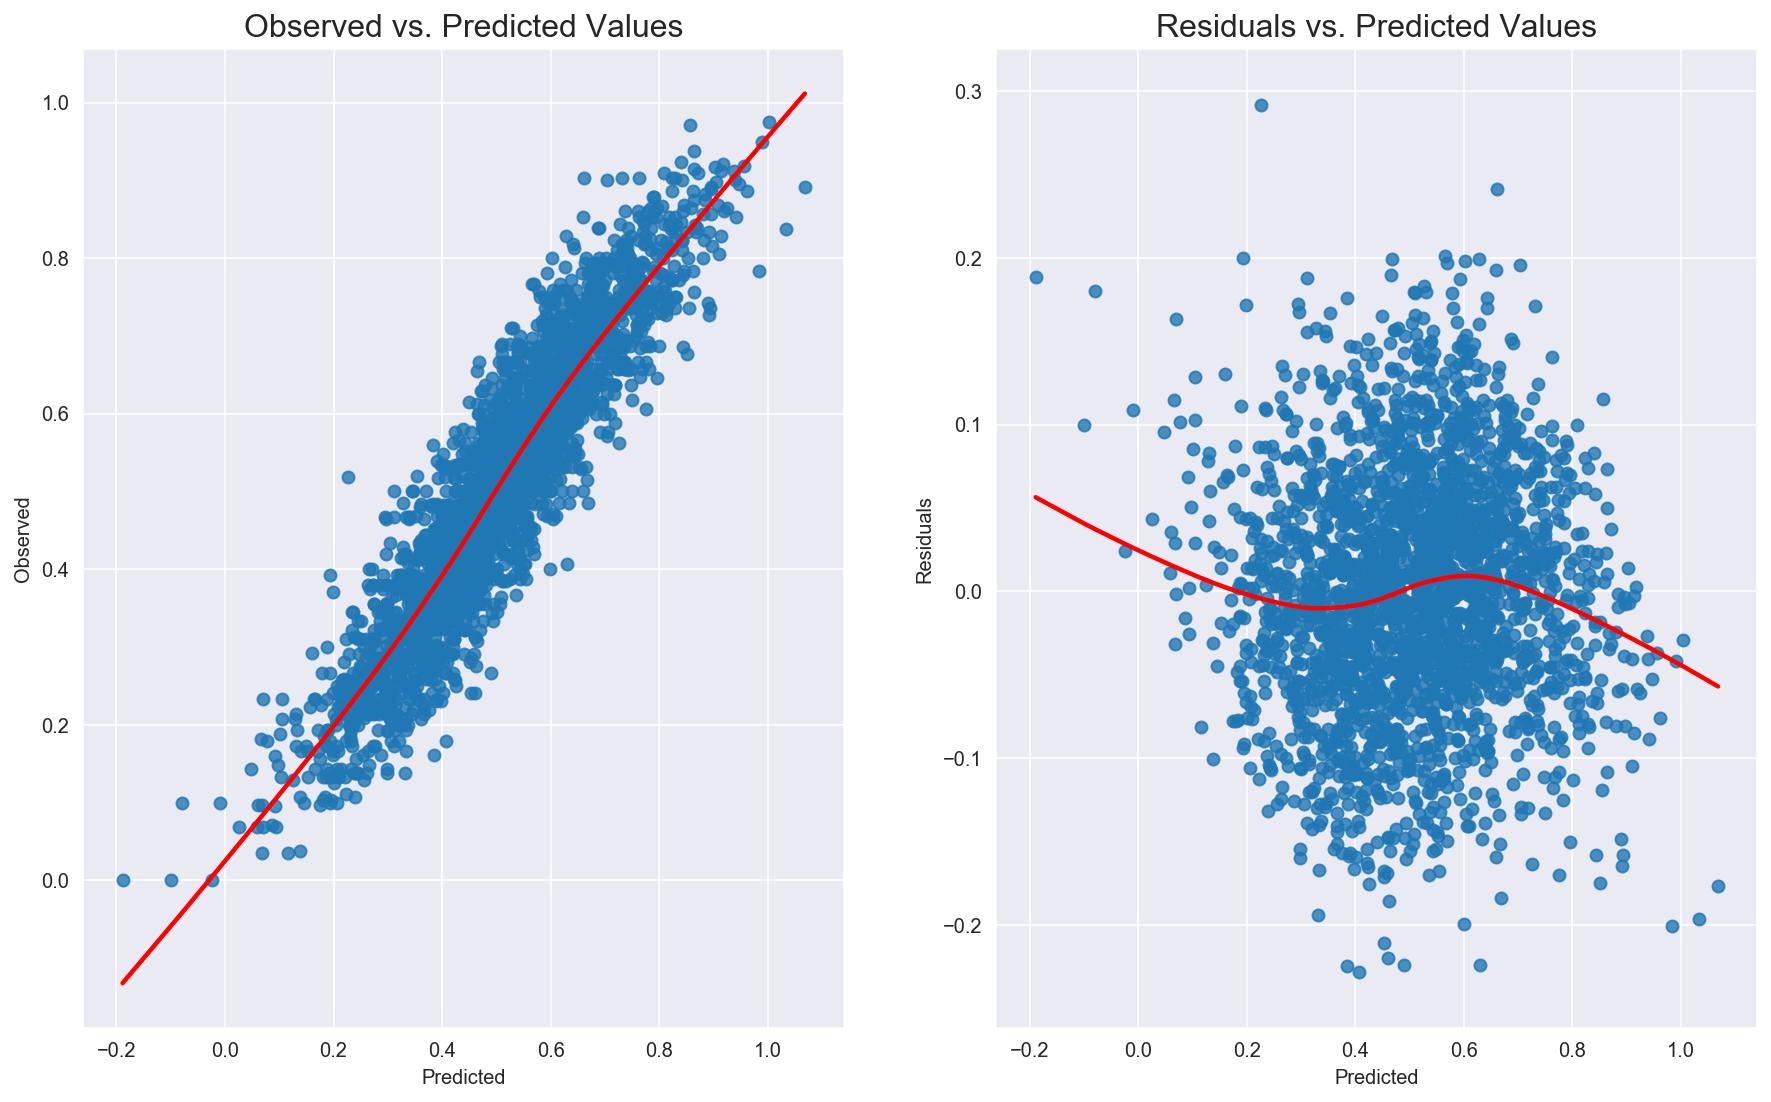

In [31]:
#Checking for linearity

%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(est2, y)  

In [33]:
#Expectation (mean) of residuals is zero
est2.resid.mean()

1.110449139294123e-15

In [36]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
pd.DataFrame({'vif': vif[1]}, index=X.columns).T

,const,TOR,TORD,ORB,DRB,2P_O,2P_D,3P_O,3P_D
vif,1.208561,1.208561,1.208561,1.208561,1.208561,1.208561,1.208561,1.208561,1.208561


Jarque-Bera test ---- statistic: 0.4985, p-value: 0.7793835921588139
Shapiro-Wilk test ---- statistic: 0.9994, p-value: 0.6907
Kolmogorov-Smirnov test ---- statistic: 0.4260, p-value: 0.0000
Anderson-Darling test ---- statistic: 0.2881, 5% critical value: 0.7860
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


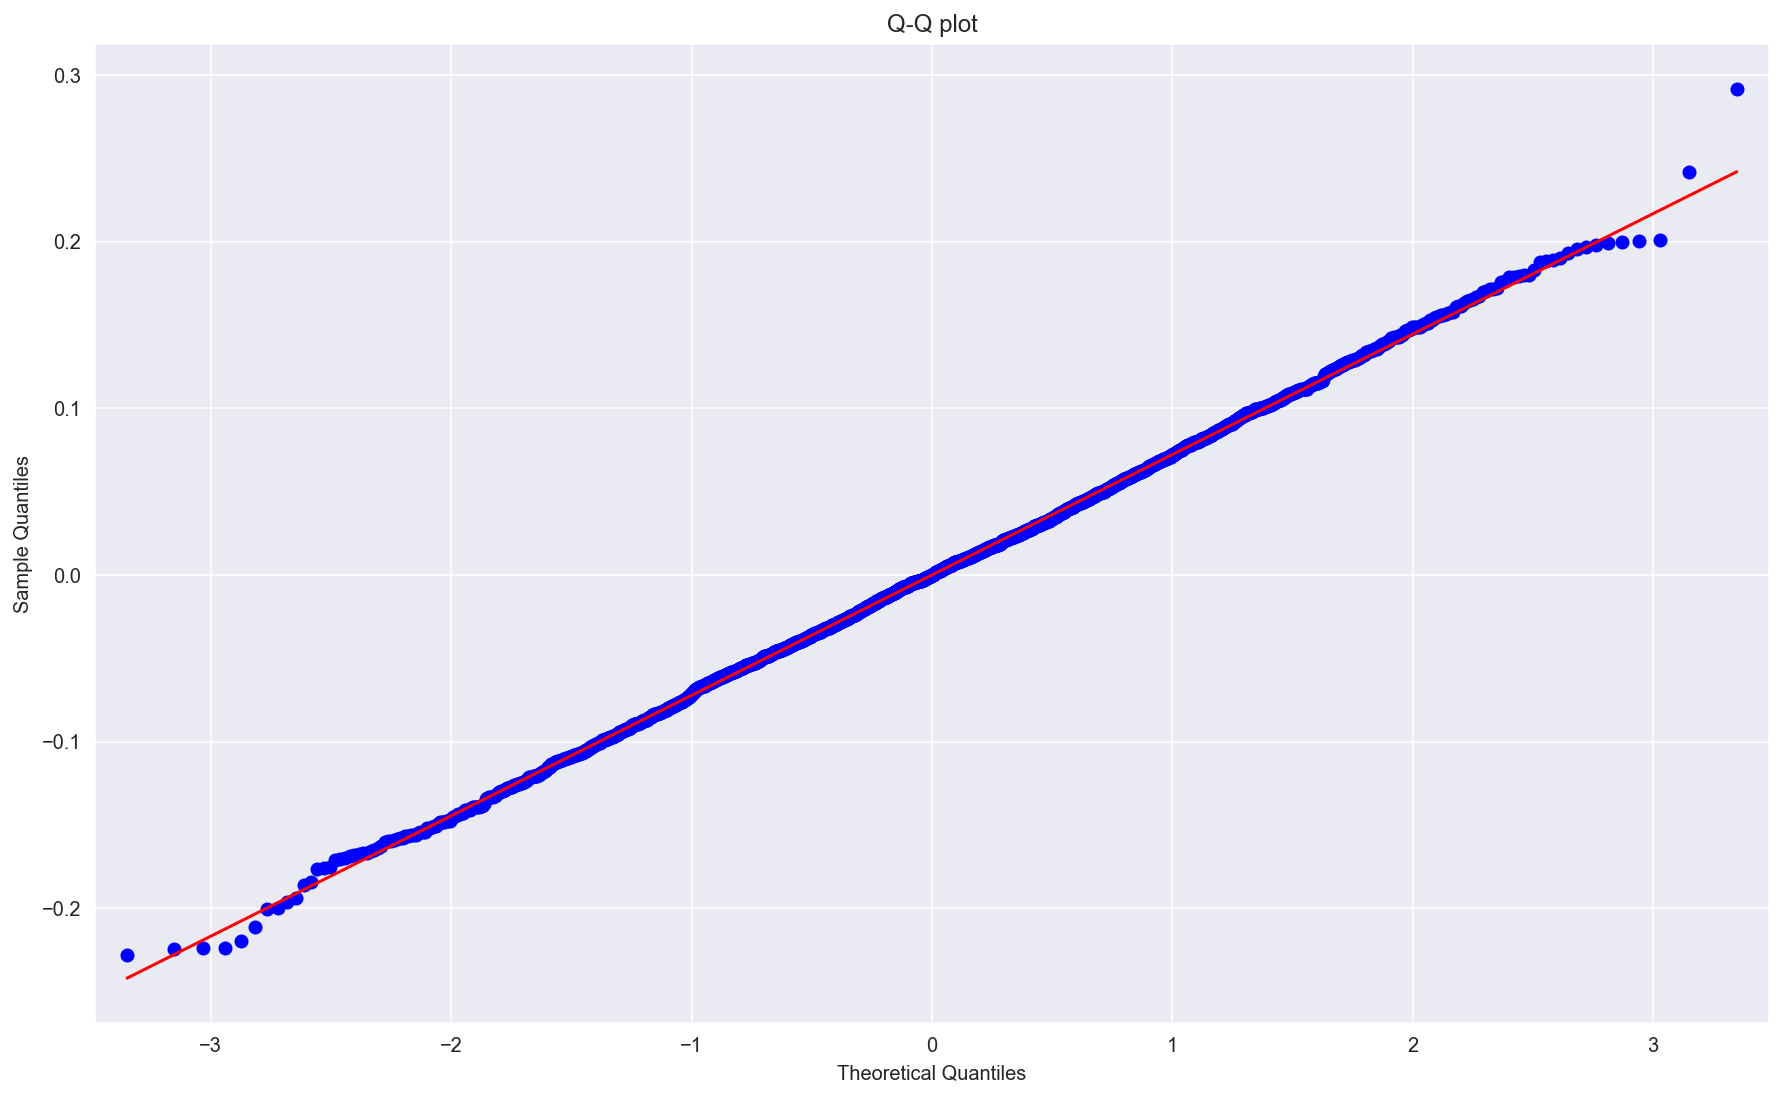

In [38]:
#Normality
from scipy import stats

def normality_of_residuals_test(model):
    '''
    Function for drawing the normal QQ-plot of the residuals and running 4 statistical tests to 
    investigate the normality of residuals.
    
    Arg:
    * model - fitted OLS models from statsmodels
    '''
    sm.ProbPlot(model.resid).qqplot(line='s');
    plt.title('Q-Q plot');

    jb = stats.jarque_bera(model.resid)
    sw = stats.shapiro(model.resid)
    ad = stats.anderson(model.resid, dist='norm')
    ks = stats.kstest(model.resid, 'norm')
    
    print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    print('If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. ')
    
normality_of_residuals_test(est2)

In [50]:
coeff = est2.params
coeff.sort_values()

TOR     -0.022893
3P_D    -0.016466
2P_D    -0.013508
DRB     -0.011718
ORB      0.009630
3P_O     0.014693
2P_O     0.018958
TORD     0.021691
const    0.397591
dtype: float64

In [ ]:
#dont turn the ball over, force turnovers, 2P > 3P marginally